# **PREDICCIÓN DE VIOLENCIA DOMÉSTICA EN COLOMBIA**

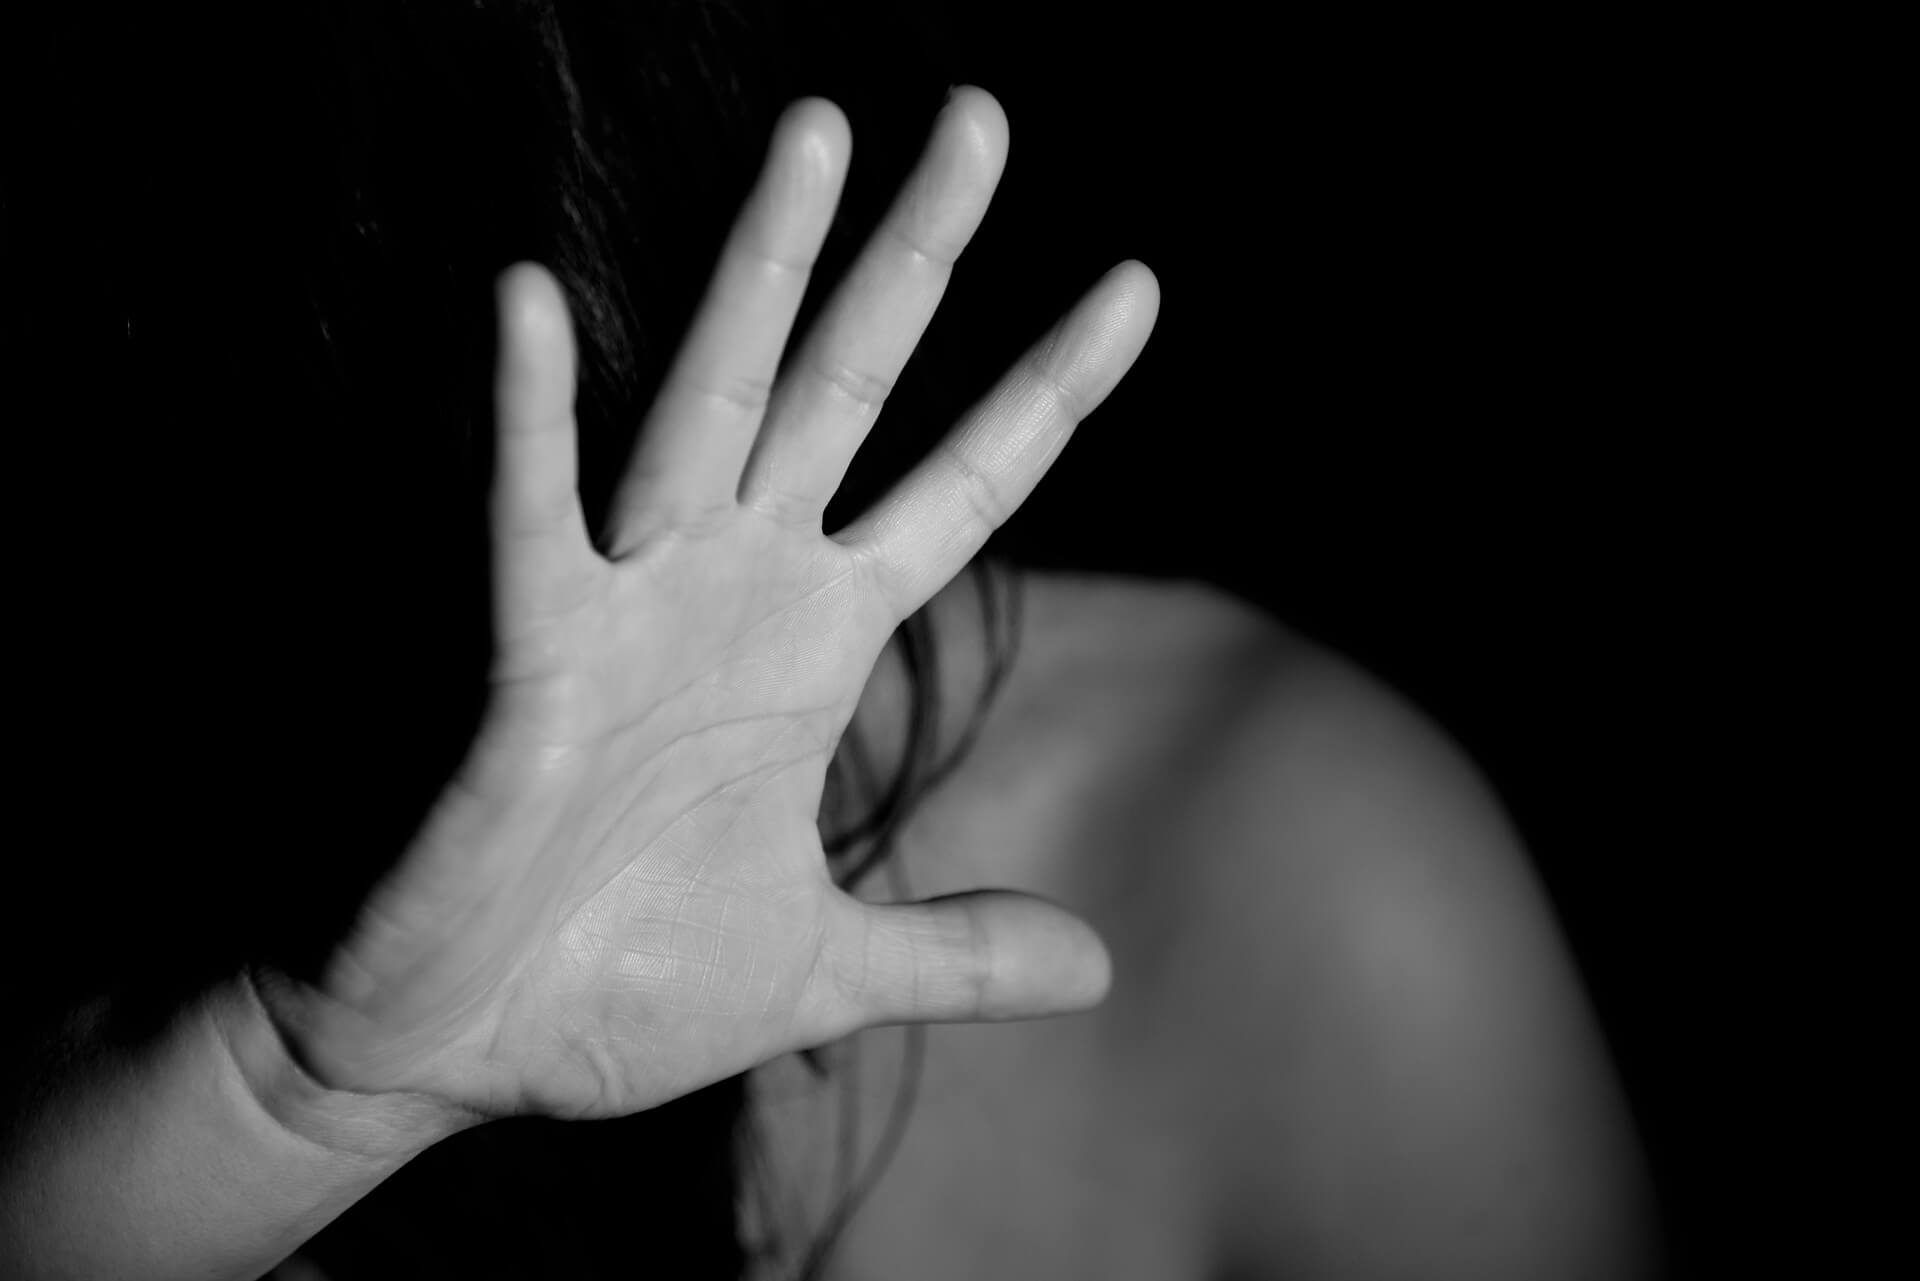

INTRODUCCIÓN:

La violencia en Colombia ha dejado de ser un problema y se ha convertido en una costumbre, desde casos generados por robos o riñas, hasta homicidios agravados y masacres, lo cuál es un claro sintoma negativo para la convivencia social del país. 




OBJETIVOS:
- Analizar la tasa de violencia intrafamiliar en Colombia por medio de un dataset obtenido de la Policía Nacional de Colombia.
- Predecir fecha de más violencia doméstica en Colombia.

In [2]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/Proyecto IA',)
# print(os.getcwd())

Mounted at /content/drive


In [3]:
#@title Importación de librerias


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import collections
import operator
from collections import Counter




# Acerca del dataset


In [84]:
#@markdown Cargar Dataset



raw_data=pd.read_csv('/content/drive/MyDrive/Proyecto IA/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv')
raw_data.head()



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.



,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


In [85]:
#@markdown Limpiando datos nulos del dataset

data=raw_data.copy()
data['ARMAS MEDIOS'].fillna(data['ARMAS MEDIOS'].mode()[0], inplace = True)
data['GENERO'].fillna(data['GENERO'].mode()[0], inplace = True)
data['GRUPO ETARIO'].fillna(data['GRUPO ETARIO'].mode()[0], inplace = True)
data['CODIGO DANE'].fillna(data['CODIGO DANE'].mode()[0], inplace = True)

In [86]:
#@markdown Acerca del dataset


raw_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO DANE   476970 non-null  object
 3   ARMAS MEDIOS  476968 non-null  object
 4   FECHA HECHO   476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


# Algunos graficos

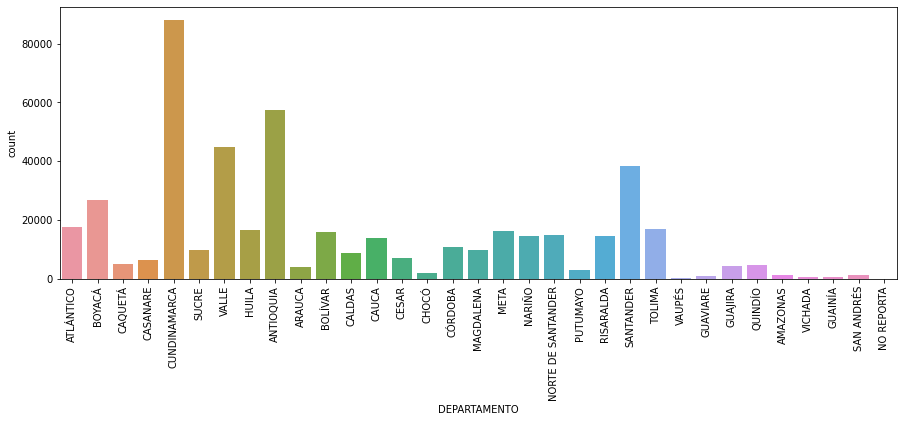

In [87]:
#@markdown Violencia por departamento
plt.figure(figsize=(15,5))
sns.countplot(x=data['DEPARTAMENTO'])
plt.xticks(rotation=90)
plt.show()

In [88]:

#datos
idx = data['DEPARTAMENTO'].value_counts().index.tolist()
valores=data['DEPARTAMENTO'].value_counts() 
print(idx)

fig = go.Figure(data=[go.Pie(labels=idx, values=valores, hole=.3)])
# Establecer el título
fig.update_layout(title_text="VIOLENCIA DOMÉSTICA POR DEPARTAMENTO")
fig.show()

['CUNDINAMARCA', 'ANTIOQUIA', 'VALLE', 'SANTANDER', 'BOYACÁ', 'ATLÁNTICO', 'TOLIMA', 'HUILA', 'META', 'BOLÍVAR', 'NORTE DE SANTANDER', 'RISARALDA', 'NARIÑO', 'CAUCA', 'CÓRDOBA', 'SUCRE', 'MAGDALENA', 'CALDAS', 'CESAR', 'CASANARE', 'CAQUETÁ', 'QUINDÍO', 'GUAJIRA', 'ARAUCA', 'PUTUMAYO', 'CHOCÓ', 'AMAZONAS', 'SAN ANDRÉS', 'GUAVIARE', 'GUAINÍA', 'VICHADA', 'VAUPÉS', 'NO REPORTA']


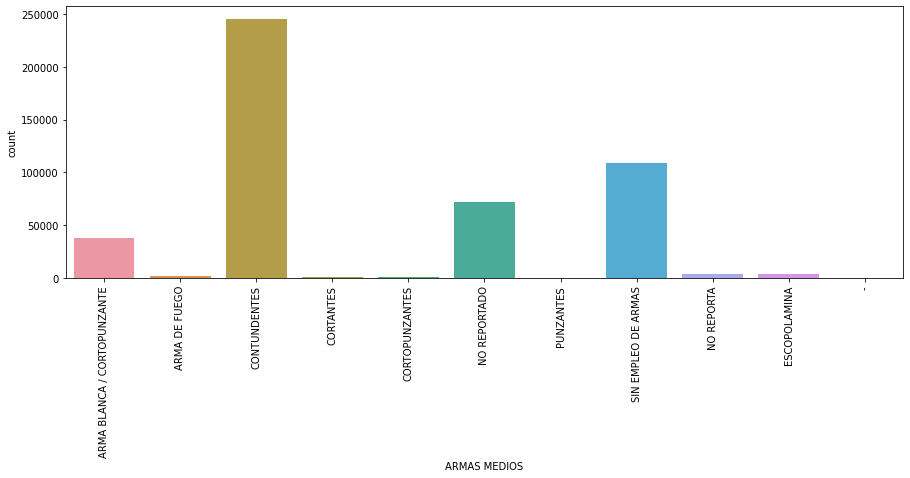

In [89]:
#@markdown Estadisticas de armas usadas en violencia domestica


plt.figure(figsize=(15,5))
sns.countplot(x=data['ARMAS MEDIOS'])
plt.xticks(rotation=90)
plt.show()



In [90]:
#datos
idx = data['ARMAS MEDIOS'].value_counts().index.tolist()
valores=data['ARMAS MEDIOS'].value_counts() 
print(idx)

fig = go.Figure(data=[go.Pie(labels=idx, values=valores, hole=.3)])
# Establecer el título
fig.update_layout(title_text="ARMAS USADAS EN VIOLENCIA DOMÉSTICA")
fig.show()

['CONTUNDENTES', 'SIN EMPLEO DE ARMAS', 'NO REPORTADO', 'ARMA BLANCA / CORTOPUNZANTE', 'NO REPORTA', 'ESCOPOLAMINA', 'ARMA DE FUEGO', 'CORTOPUNZANTES', 'CORTANTES', 'PUNZANTES', '-']


In [91]:
#datos
idx = data['MUNICIPIO'].value_counts().index.tolist()
valores=data['MUNICIPIO'].value_counts() 
print(idx)

fig = go.Figure(data=[go.Pie(labels=idx, values=valores, hole=.3)])
# Establecer el título
fig.update_layout(title_text="MUNICIPIOS CON MÁS VIOLENCIA DOMÉSTICA")
fig.show()

['BOGOTÁ D.C. (CT)', 'MEDELLÍN (CT)', 'CALI (CT)', 'BUCARAMANGA (CT)', 'VILLAVICENCIO (CT)', 'BARRANQUILLA (CT)', 'PASTO (CT)', 'CARTAGENA (CT)', 'CÚCUTA (CT)', 'IBAGUÉ (CT)', 'PEREIRA (CT)', 'SOACHA', 'NEIVA (CT)', 'TUNJA (CT)', 'POPAYÁN (CT)', 'SANTA MARTA (CT)', 'BARRANCABERMEJA', 'FLORIDABLANCA', 'SOLEDAD', 'SINCELEJO (CT)', 'GIRÓN', 'BELLO', 'DUITAMA', 'MONTERÍA (CT)', 'ITAGUI', 'DOSQUEBRADAS', 'MANIZALES (CT)', 'VALLEDUPAR (CT)', 'FLORENCIA (CT)', 'PIEDECUESTA', 'GUADALAJARA DE BUGA', 'BUENAVENTURA', 'ARMENIA (CT)', 'ENVIGADO', 'PALMIRA', 'SOGAMOSO', 'YOPAL (CT)', 'TULUÁ', 'RIOHACHA (CT)', 'PITALITO', 'ZIPAQUIRÁ', 'ARAUCA (CT)', 'FACATATIVÁ', 'CARTAGO', 'OCAÑA', 'FUSAGASUGÁ', 'GIRARDOT', 'MAGANGUÉ', 'CHIQUINQUIRÁ', 'APARTADÓ', 'ACACÍAS', 'CHÍA', 'SANTANDER DE QUILICHAO', 'BARBOSA', 'MOSQUERA', 'AGUACHICA', 'SANTA ROSA DE CABAL', 'IPIALES', 'RIONEGRO', 'YUMBO', 'LETICIA (CT)', 'LA DORADA', 'SAN ANDRES DE TUMACO', 'GRANADA', 'GARZÓN', 'CALDAS', 'EL CARMEN DE BOLÍVAR', 'MADRID', 'CO

# Tratando los datos del dataset

In [92]:
#@markdown Municipio moda en el dataset - Reemplazar datos sin municipio

# data['MUNICIPIO'].mode()
data['MUNICIPIO']=data['MUNICIPIO'].replace({'NO REPORTA':  'BOGOTÁ D.C. (CT)', '-': 'BOGOTÁ D.C. (CT)'})

In [93]:
#@markdown Departamento moda - Reemplazar datos sin departamento

# data['DEPARTAMENTO'].mode()
data['DEPARTAMENTO']=data['DEPARTAMENTO'].replace({'NO REPORTA':  'CUNDINAMARCA', '-': 'CUNDINAMARCA'})


In [94]:
#@markdown Reeemplazar datos sin genero a la moda
# data['GENERO'].mode()
data['GENERO']=data['GENERO'].replace({'NO REPORTA':  'FEMENINO', '-': 'FEMENINO'})


In [95]:
#@markdown Reemplazar datos sin GRUPO ETARIO por la moda

# data['GRUPO ETARIO'].mode()

data['GRUPO ETARIO']=data['GRUPO ETARIO'].replace({'NO REPORTA': 'ADULTOS'})



MUJERES :  367211
HOMBRES :  109759
NO REPORTA :  0


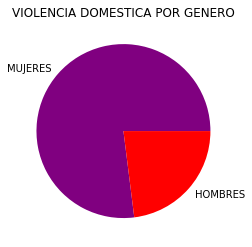

Porcentaje de mujeres que sufren violencia domestica:  76.9882801853366
Porcentaje de hombres que sufren violencia domestica:  23.011719814663397


In [96]:
#@markdown Reemplazamos los datos de la columna 'GENERO' por datos numéricos
data["GENERO"].replace(["FEMENINO","MASCULINO","NO REPORTA","-" ],[1,2,3,4],inplace=True)
data["GENERO"] = data["GENERO"].replace(np.nan,0)
MUJERES = data['GENERO'].eq(1).sum()
HOMBRES = data['GENERO'].eq(2).sum()
NOREPORTA = data['GENERO'].eq(3).sum()
SIN = data['GENERO'].eq(4).sum()

print('MUJERES : ', MUJERES)
print('HOMBRES : ', HOMBRES)
print('NO REPORTA : ', NOREPORTA+SIN)

M = MUJERES*(100/476970)
H = HOMBRES*(100/476970)
NR = (NOREPORTA+SIN)*(100/476970)
 
# Datos a graficar
etiquetas = ['MUJERES','HOMBRES']
valores = [M,H]
colores = ['purple','red','yellow']
 
plt.pie(x=valores, labels=etiquetas, colors = colores)
plt.title('VIOLENCIA DOMESTICA POR GENERO')
plt.show()

print('Porcentaje de mujeres que sufren violencia domestica: ', M)
print('Porcentaje de hombres que sufren violencia domestica: ', H)


MENORES :  26448
ADOLESCENTES :  28396
ADULTOS :  422126
NO REPORTA :  0


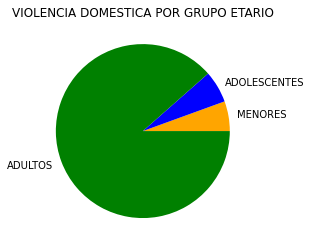

Porcentaje de menores que sufren violencia domestica:  5.545002830366689
Porcentaje de adolescentes que sufren violencia domestica:  5.953414260854981
Porcentaje de adultos que sufren violencia domestica:  88.50158290877833


In [97]:
#@markdown Reemplazamos los datos de la columna 'GRUPO ETARIO' por datos numéricos
data["GRUPO ETARIO"].replace(["MENORES","ADOLESCENTES","ADULTOS","NO REPORTA"],[1,2,3,4],inplace=True)
data["GRUPO ETARIO"] = data["GRUPO ETARIO"].replace(np.nan,0)
MENORES = data['GRUPO ETARIO'].eq(1).sum()
ADOLESCENTES = data['GRUPO ETARIO'].eq(2).sum()
ADULTOS = data['GRUPO ETARIO'].eq(3).sum()
NOREPORTA = data['GRUPO ETARIO'].eq(4).sum()
print('MENORES : ', MENORES)
print('ADOLESCENTES : ', ADOLESCENTES)
print('ADULTOS : ', ADULTOS)
print('NO REPORTA : ', NOREPORTA)

MN = MENORES*(100/476970)
AC = ADOLESCENTES*(100/476970)
AD = ADULTOS*(100/476970)
NR = NOREPORTA*(100/476970)


# Datos a graficar
etiquetas = ['MENORES','ADOLESCENTES','ADULTOS']
valores = [MN,AC,AD]
colores = ['orange','blue','green','yellow']
 
plt.pie(x=valores, labels=etiquetas, colors = colores)
plt.title('VIOLENCIA DOMESTICA POR GRUPO ETARIO')
plt.show()

print('Porcentaje de menores que sufren violencia domestica: ', MN)
print('Porcentaje de adolescentes que sufren violencia domestica: ', AC)
print('Porcentaje de adultos que sufren violencia domestica: ', AD)

In [98]:
#@markdown Mapeando el tipo de arma a un dato numerico



data['ARMAS MEDIOS'] = data['ARMAS MEDIOS'].map({'ARMA BLANCA / CORTOPUNZANTE': 1, 'ARMA DE FUEGO': 2, 'CONTUNDENTES':3, 'CORTANTES': 4, 'CORTOPUNZANTES': 5,'NO REPORTADO': 3, 'PUNZANTES': 6, 'SIN EMPLEO DE ARMAS': 7,
        'NO REPORTA':3, 'ESCOPOLAMINA': 8 ,'-': 3})




In [99]:
#@markdown Eliminando datos de fecha irregulares
#pr = ds.FECHA_HECHO.values
#ds.FECHA_HECHO[ds.FECHA_HECHO[:].find("/") == -1]
#ds.FECHA_HECHO[1].index("/")
#print(ds.FECHA_HECHO[476962])
#pr = ds[ds["FECHA_HECHO"].find("/") != -1 ]
data=data.drop(range(476962,476970), axis=0)
data.tail()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
476957,VICHADA,PUERTO CARREÑO (CT),99001000,7,5/01/2021,1,3,1
476958,VICHADA,PUERTO CARREÑO (CT),99001000,7,14/01/2021,1,3,1
476959,VICHADA,PUERTO CARREÑO (CT),99001000,7,26/03/2021,1,3,1
476960,VICHADA,PUERTO CARREÑO (CT),99001000,7,27/03/2021,1,3,1
476961,VICHADA,PUERTO CARREÑO (CT),99001000,7,15/04/2021,1,3,1


In [100]:
#@markdown Separando dia / mes / año

data['AÑO'] = data['FECHA HECHO'].str[-4:]
data['FECHA HECHO'] =data['FECHA HECHO'].str[:-5]
data['MES'] = data['FECHA HECHO'].str[-2:]
data['FECHA HECHO'] =data['FECHA HECHO'].str[:-3]
data['DIA'] = data['FECHA HECHO']

data = data.drop(['FECHA HECHO'],axis=1)

data.head(5)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD,AÑO,MES,DIA
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,1,2,3,1,2010,01,1
1,BOYACÁ,DUITAMA,15238000,1,1,3,1,2010,01,1
2,CAQUETÁ,PUERTO RICO,18592000,1,2,3,1,2010,01,1
3,CASANARE,MANÍ,85139000,1,1,3,1,2010,01,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,1,1,3,1,2010,01,1


In [101]:
#@markdown Reemplazamos los datos de la columna 'DEPARTAMENTO' por datos numéricos
data['DEPARTAMENTO'].replace(['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA','CUNDINAMARCA', 'GUAINÍA', 'GUAVIARE',
       'HUILA', 'GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO',
       'QUINDÍO', 'RISARALDA', 'SANTANDER', 'SUCRE', 'SAN ANDRÉS',
       'TOLIMA', 'VALLE', 'VAUPÉS', 'VICHADA'],range(32),inplace=True)

In [102]:
#@markdown Mapeando municipios a valores numericos

municipios = np.unique(data['MUNICIPIO'].values).tolist()
data['MUNICIPIO'].replace(municipios,range(0,len(municipios)),inplace=True)


In [103]:
#datos
idx = data['MUNICIPIO'].value_counts().index.tolist()
valores=data['MUNICIPIO'].value_counts() 
print(idx)

fig = go.Figure(data=[go.Pie(labels=idx, values=valores, hole=.3)])
# Establecer el título
fig.update_layout(title_text="MUNICIPIOS CON MÁS VIOLENCIA DOMÉSTICA")
fig.show()

[99, 509, 129, 106, 993, 83, 605, 150, 248, 397, 615, 851, 553, 938, 637, 812, 80, 316, 858, 848, 350, 86, 256, 535, 407, 255, 494, 968, 313, 619, 360, 108, 63, 304, 596, 856, 1008, 937, 701, 629, 1018, 51, 306, 152, 569, 330, 348, 485, 181, 44, 3, 191, 824, 77, 539, 9, 815, 403, 702, 1010, 465, 430, 736, 353, 344, 127, 266, 484, 216, 758, 138, 411, 305, 684, 738, 942, 609, 984, 220, 473, 723, 983, 198, 721, 176, 432, 719, 156, 522, 923, 488, 652, 329, 453, 270, 490, 1015, 650, 469, 167, 769, 446, 890, 502, 315, 792, 651, 632, 327, 940, 457, 126, 838, 784, 734, 250, 159, 12, 826, 349, 990, 35, 532, 912, 640, 132, 831, 194, 124, 733, 783, 707, 599, 703, 402, 717, 171, 461, 898, 854, 529, 671, 268, 802, 696, 356, 621, 120, 204, 514, 260, 5, 995, 989, 178, 801, 949, 366, 440, 311, 982, 61, 655, 478, 913, 405, 424, 135, 673, 396, 296, 1005, 333, 370, 146, 690, 40, 534, 589, 663, 776, 711, 336, 521, 840, 13, 638, 102, 730, 782, 658, 455, 654, 112, 365, 518, 234, 836, 1000, 451, 346, 592, 10

In [104]:
#@markdown Mapeando fechas a valores numericos
data[['AÑO','MES',"DIA"]]=data[['AÑO','MES',"DIA"]].astype(int)

In [105]:
data.drop(['CODIGO DANE'],axis = 1, inplace = True)

In [106]:
data["POBLACIÓN_DEPARTAMENTO"] = data.DEPARTAMENTO
#data["TASA_DEPARTAMENTO"] = data.DEPARTAMENTO
data.tail()

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD,AÑO,MES,DIA,POBLACIÓN_DEPARTAMENTO
476957,31,654,7,1,3,1,2021,1,5,31
476958,31,654,7,1,3,1,2021,1,14,31
476959,31,654,7,1,3,1,2021,3,26,31
476960,31,654,7,1,3,1,2021,3,27,31
476961,31,654,7,1,3,1,2021,4,15,31


In [107]:
data['POBLACIÓN_DEPARTAMENTO'] = data['POBLACIÓN_DEPARTAMENTO'].replace({0: 79020, 1: 6677930, 2:294206, 3: 2722128, 4: 2180976,5: 1242731, 6: 1018453, 7: 410521,
        8:435195, 9: 1491937 ,10: 1295387,11: 544764,12: 1828947,13: 3242999,14: 50636,15: 86657,16: 1122622,17: 965718,18: 1427026,19: 1063454,20: 1627589,
        21: 1620318,22: 359127,23: 555401,24: 961055,25: 2280908,26: 949252,27: 63692,28: 1339998,29: 4532152,30: 44712,31: 112958})
#data['TASA_DEPARTAMENTO'] = data['TASA_DEPARTAMENTO'].replace({0: 13.2624, 1: 85.7870, 2:13.0928, 3: 64.3467, 4: 73.1507362,5: 1242731, 6: 1018453, 7: 410521,
#        8:435195, 9: 1491937 ,10: 1295387,11: 544764,12: 1828947,13: 3242999,14: 50636,15: 86657,16: 1122622,17: 965718,18: 1427026,19: 1063454,20: 1627589,
#        21: 1620318,22: 359127,23: 555401,24: 961055,25: 2280908,26: 949252,27: 63692,28: 1339998,29: 4532152,30: 44712,31: 112958})
data.tail()

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD,AÑO,MES,DIA,POBLACIÓN_DEPARTAMENTO
476957,31,654,7,1,3,1,2021,1,5,112958
476958,31,654,7,1,3,1,2021,1,14,112958
476959,31,654,7,1,3,1,2021,3,26,112958
476960,31,654,7,1,3,1,2021,3,27,112958
476961,31,654,7,1,3,1,2021,4,15,112958


In [108]:
dictDepartamento=collections.Counter(data['DEPARTAMENTO'])
print(dictDepartamento)

dictDepartamento=collections.Counter(data['DEPARTAMENTO'])
import collections
import operator
from collections import Counter
rankingDepartamento = sorted(dictDepartamento.items(), key=operator.itemgetter(1), reverse=True)
print(rankingDepartamento)

Counter({13: 88104, 1: 57288, 29: 44909, 25: 38493, 5: 26920, 3: 17516, 28: 17007, 16: 16547, 19: 16223, 4: 15954, 21: 14919, 24: 14381, 20: 14373, 9: 13947, 12: 10800, 26: 9745, 18: 9691, 6: 8742, 10: 7109, 8: 6418, 7: 4857, 23: 4800, 17: 4434, 2: 3852, 22: 3104, 11: 2071, 0: 1408, 27: 1155, 15: 886, 14: 518, 31: 418, 30: 373})
[(13, 88104), (1, 57288), (29, 44909), (25, 38493), (5, 26920), (3, 17516), (28, 17007), (16, 16547), (19, 16223), (4, 15954), (21, 14919), (24, 14381), (20, 14373), (9, 13947), (12, 10800), (26, 9745), (18, 9691), (6, 8742), (10, 7109), (8, 6418), (7, 4857), (23, 4800), (17, 4434), (2, 3852), (22, 3104), (11, 2071), (0, 1408), (27, 1155), (15, 886), (14, 518), (31, 418), (30, 373)]


In [109]:
dictDepartamento=collections.Counter(data['DEPARTAMENTO'])

import collections
import operator
from collections import Counter
rankingDepartamento = sorted(dictDepartamento.items(), key=operator.itemgetter(1), reverse=True)
x, y = zip(*rankingDepartamento) 
n_casos=[]
nom_departamento=[]
for i in range(len(x)):
  n_casos.append(y[i])
  nom_departamento.append(x[i])

print(n_casos)

#tasa = (n_casos*100000)/

[88104, 57288, 44909, 38493, 26920, 17516, 17007, 16547, 16223, 15954, 14919, 14381, 14373, 13947, 10800, 9745, 9691, 8742, 7109, 6418, 4857, 4800, 4434, 3852, 3104, 2071, 1408, 1155, 886, 518, 418, 373]


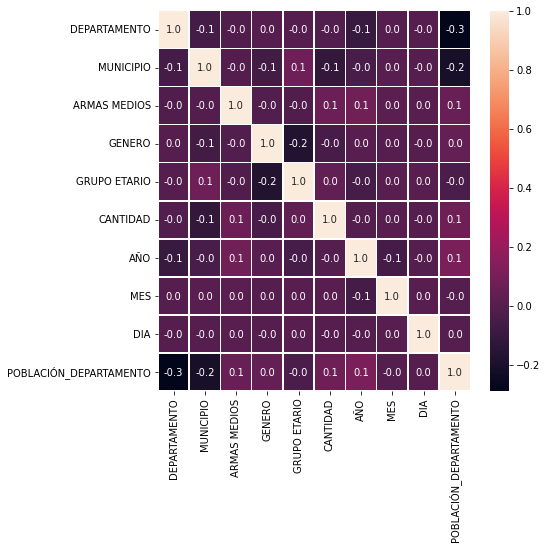

In [110]:
#@markdown Matriz de correlación
f, ax = plt.subplots(figsize=(7,7))
import seaborn as sns
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


**ALGORITMOS**

In [111]:
#Regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
#Metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
#Otros
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
#PCA
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.datasets import *


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning:

A column-vector y was p

Text(0.5, 1.0, 'RF y DT')

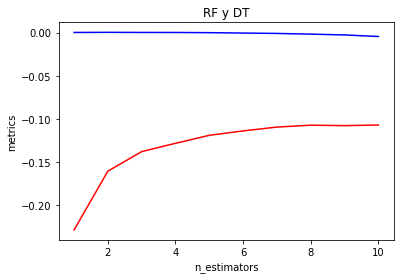

In [56]:
X = data.iloc[:,[0,1,2,3,4,5,6,9]]
#print(X)
y_r = data.iloc[:,[8]]
y_r2 = data.iloc[:,[6]]
y_r3 = data.iloc[:,[7]]
#print(y_r)

Xtr, Xts, ytr, yts = train_test_split(X,y_r, test_size=.3)

#st = DecisionTreeRegressor(random_state=1).fit(Xtr,ytr)
#p = st.predict(Xts)
#score = mean_squared_error(yts,p)
#score
K= ["linear", "poly", "rbf", "sigmoid", "precomputed"]
scores_ne = []
scores_d =[]
#score_svr=[]
RFR_range= range(10)
for chage in RFR_range:
  est=DecisionTreeRegressor(max_depth=chage+1).fit(Xtr,ytr);
  est1=RandomForestRegressor(n_estimators=chage+1).fit(Xtr,ytr);
  #est3 = SVR().fit(Xtr,ytr)
  scores_d.append(est1.score(Xts,yts))
  scores_ne.append(est.score(Xts,yts))
  #score_svr.append(est3.score(Xts,yts))
#for i in K:
#  est3 = SVR(kernel=i).fit(Xtr,ytr);
#  score_svr.append(est3.score(Xts,yts))

plt.plot(range(1,11), scores_d, color="red")
#plt.plot(range(1,11), scores_svr, color="orage")
plt.plot(range(1,11), scores_ne, color="blue")
plt.xlabel("n_estimators");plt.ylabel("metrics")
plt.title("RF y DT")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning:

A column-vector y was p

Text(0.5, 1.0, 'RF y DT')

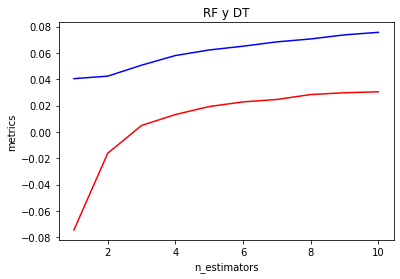

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,y_r3, test_size=.3)

#st = DecisionTreeRegressor(random_state=1).fit(Xtr,ytr)
#p = st.predict(Xts)
#score = mean_squared_error(yts,p)
#score
K= ["linear", "poly", "rbf", "sigmoid", "precomputed"]
scores_ne = []
scores_d =[]
#score_svr=[]
RFR_range= range(10)
for chage in RFR_range:
  est=DecisionTreeRegressor(max_depth=chage+1).fit(Xtr,ytr);
  est1=RandomForestRegressor(n_estimators=chage+1).fit(Xtr,ytr);
  #est3 = SVR().fit(Xtr,ytr)
  scores_d.append(est1.score(Xts,yts))
  scores_ne.append(est.score(Xts,yts))
  #score_svr.append(est3.score(Xts,yts))
#for i in K:
#  est3 = SVR(kernel=i).fit(Xtr,ytr);
#  score_svr.append(est3.score(Xts,yts))

plt.plot(range(1,11), scores_d, color="red")
#plt.plot(range(1,11), scores_svr, color="orage")
plt.plot(range(1,11), scores_ne, color="blue")
plt.xlabel("n_estimators");plt.ylabel("metrics")
plt.title("RF y DT")

In [ ]:
model1 = RandomForestRegressor(n_estimators=10)
model2 = DecisionTreeRegressor(max_depth=8)
X = data.iloc[:,[0,1,2,3,4,5,6]]
#print(X)
y_r = data.iloc[:,[8]]
y_r2 = data.iloc[:,[6]]
y_r3 = data.iloc[:,[7]]

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,y_r, test_size=.2)
m1s_yr = cross_val_score(model1, Xtr, ytr, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
m2s_yr = cross_val_score(model2, Xtr, ytr, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
 

Xtr, Xts, ytr, yts = train_test_split(X,y_r3, test_size=.2)
m1s_yr3 = cross_val_score(model1, Xtr, ytr, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
m2s_yr3 = cross_val_score(model2, Xtr, ytr, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/s

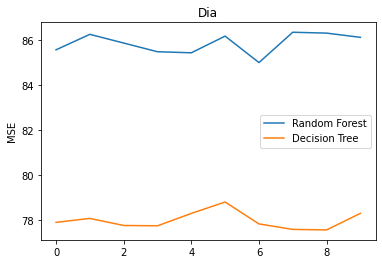

In [ ]:
plt.plot(m1s_yr,label="Random Forest")
plt.plot(m2s_yr,label="Decision Tree")
plt.ylabel("MSE") #Error cuadratico medio
plt.title("Dia")
plt.legend()
plt.show()

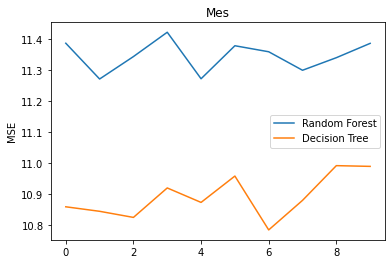

In [ ]:
plt.plot(m1s_yr3,label="Random Forest")
plt.plot(m2s_yr3,label="Decision Tree")
plt.ylabel("MSE")
plt.title("Mes")
plt.legend()
plt.show()

## **APRENDIZAJE NO SUPERVISADO **

In [129]:
data0 = data.iloc[:,[0,2]].values
data0.shape
print(data0)

[[ 3  1]
 [ 5  1]
 [ 7  1]
 ...
 [31  7]
 [31  7]
 [31  7]]


Text(0.5, 1.0, 'Metodo K-Means por Departamento')

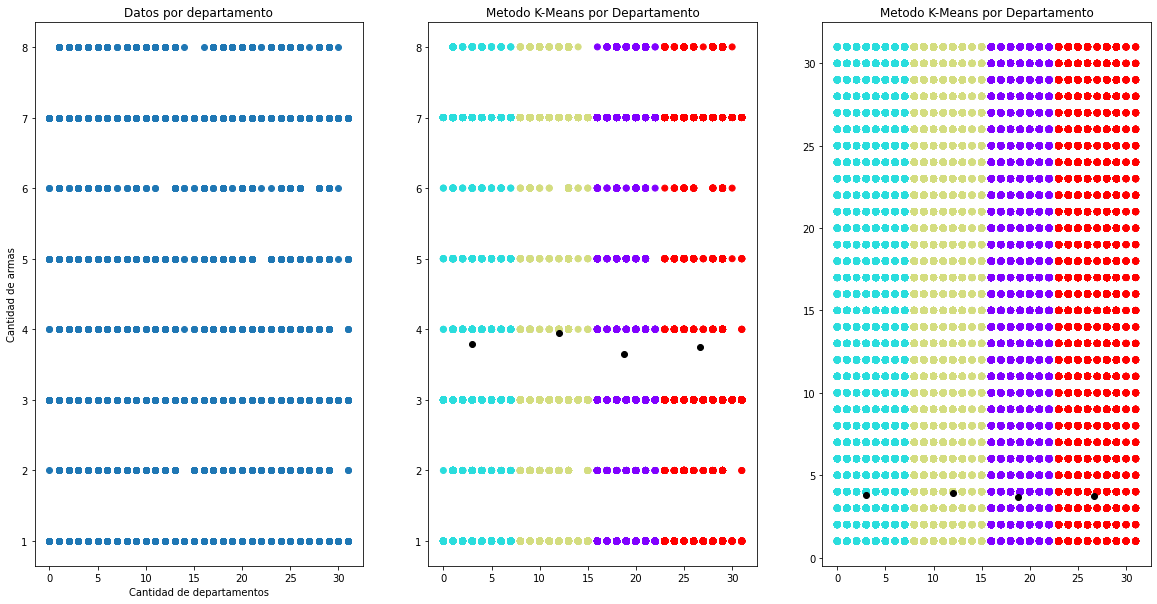

In [131]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data0)

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.scatter(data0[:,0], data0[:,1], cmap='rainbow')
plt.title('Datos por departamento')
plt.xlabel('Cantidad de departamentos')
plt.ylabel('Cantidad de armas')

plt.subplot(132)
plt.scatter(data0[:,0], data0[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Metodo K-Means por Departamento')

plt.subplot(133)
plt.scatter(data.iloc[:,[0]], data.loc[:,["DIA"]], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Metodo K-Means por Departamento')

In [112]:
data1 = data.loc[data.MUNICIPIO == 99][["GENERO", "ARMAS MEDIOS"]].values
data1.shape
print(data1)

[[1 1]
 [1 3]
 [1 3]
 ...
 [2 7]
 [2 7]
 [2 7]]


Text(0.5, 1.0, 'Metodo K-Means en Bogotá')

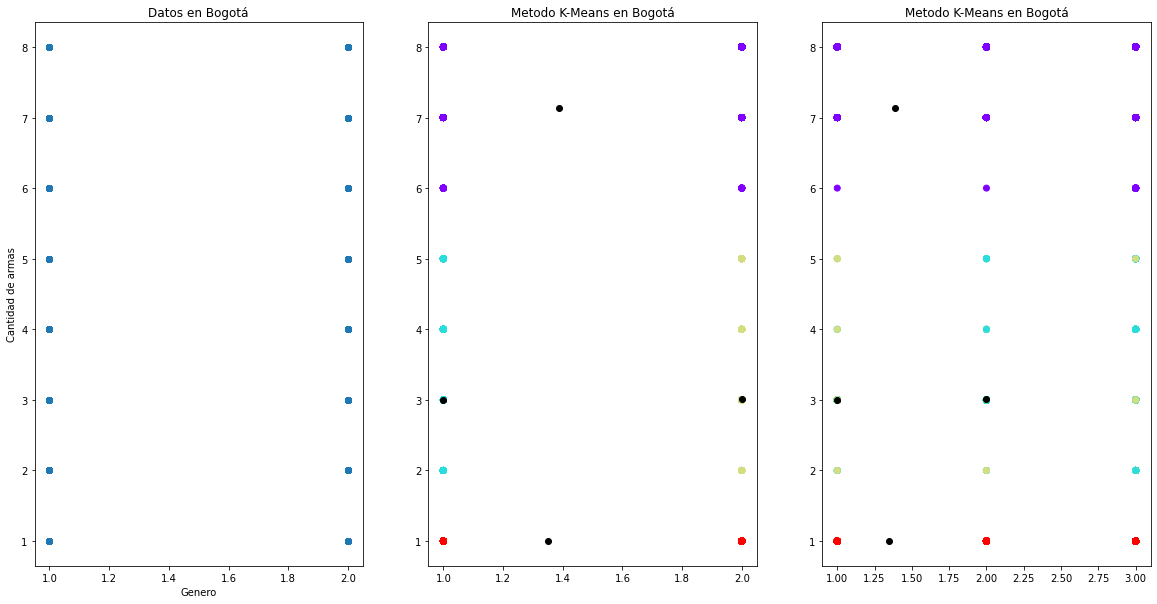

In [114]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data1)

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.scatter(data1[:,0], data1[:,1], cmap='rainbow')
plt.title('Datos en Bogotá')
plt.xlabel('Genero')
plt.ylabel('Cantidad de armas')

plt.subplot(132)
plt.scatter(data1[:,0], data1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Metodo K-Means en Bogotá')

plt.subplot(133)
plt.scatter(data.loc[data.MUNICIPIO == 99][["GRUPO ETARIO"]], data.loc[data.MUNICIPIO == 99][["ARMAS MEDIOS"]], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Metodo K-Means en Bogotá')


In [115]:
data1 = data.iloc[:,[1,2]].values
data1.shape
print(data1)

[[ 83   1]
 [256   1]
 [667   1]
 ...
 [654   7]
 [654   7]
 [654   7]]


Text(0.5, 1.0, 'Metodo K-Means por Municipio')

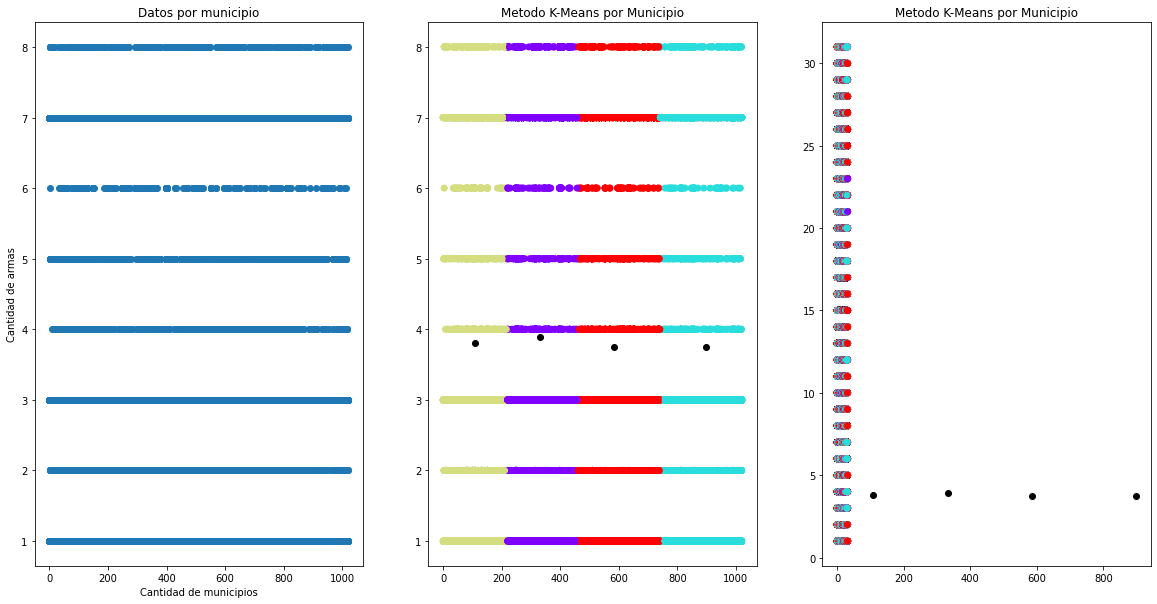

In [118]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data1)

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.scatter(data1[:,0], data1[:,1], cmap='rainbow')
plt.title('Datos por municipio')
plt.xlabel('Cantidad de municipios')
plt.ylabel('Cantidad de armas')

plt.subplot(132)
plt.scatter(data1[:,0], data1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Metodo K-Means por Municipio')

plt.subplot(133)
plt.scatter(data.iloc[:,[0]], data.loc[:,["DIA"]], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Metodo K-Means por Municipio')

In [119]:
data3 = data.iloc[:,[4,5]].values
data3.shape
print(data3)

[[3 1]
 [3 1]
 [3 1]
 ...
 [3 1]
 [3 1]
 [3 1]]


Text(0.5, 1.0, 'Metodo K-Means por grupo etario')

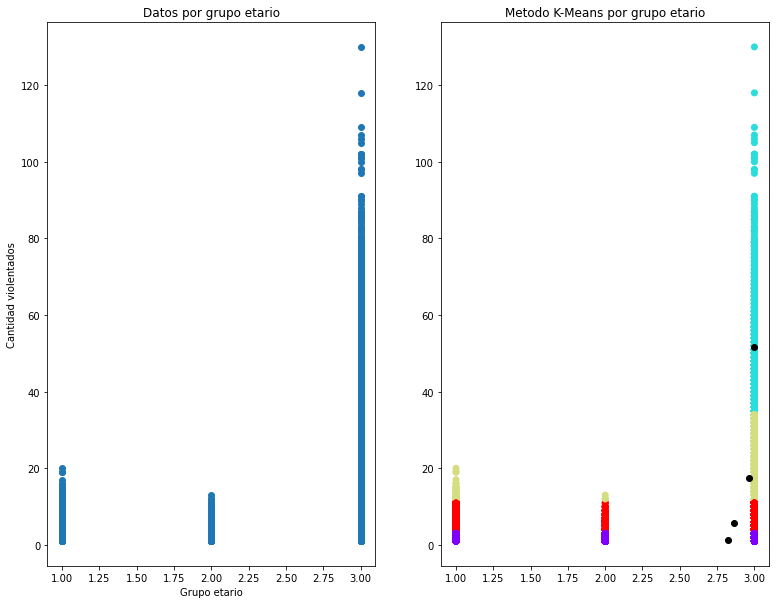

In [124]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data3)

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.scatter(data3[:,0], data3[:,1], cmap='rainbow')
plt.title('Datos por grupo etario')
plt.xlabel('Grupo etario')
plt.ylabel('Cantidad violentados')

plt.subplot(132)
plt.scatter(data3[:,0], data3[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Metodo K-Means por grupo etario')

#plt.subplot(133)
#plt.scatter(data.iloc[:,[0]], data.loc[:,["DEPARTAMENTO"]], c=kmeans.labels_, cmap='rainbow')
#plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
#plt.title('Metodo K-Means por Municipio')